In [59]:
!pip install pandasql

In [60]:
import pandas as pd
import pandasql

In [61]:
ovnis = pd.read_csv("OVNIS.csv")

In [62]:
ovnis.head(5)


,Date / Time,City,State,Shape,Duration,Summary,Posted
0,1/29/97 23:15,East Greenwich,RI,Disk,5 minutes,"I witnessed a UFO which may be of the Lazar""Sp...",3/7/98
1,1/26/97 22:00,Flagstaff,AZ,Light,six minutes,It traveled at about the same speed we were go...,3/19/09
2,1/25/97 21:00,Marion,WI,Triangle,2 minutes,On a camping trip 3 triangle shaped objects we...,3/7/98
3,1/25/97 06:00,Mount Hope/Binbrook (Canada),ON,Disk,1/2 hour,"A large disk or saucer type object, approximat...",4/28/01
4,1/24/97 19:00,Alta,UT,Other,3 hours plus,"A ""moving star"" similar to a satellite stopped...",3/7/98


In [63]:
# 5.4     Item 1 Saber a quantidade de linhas, observações ou variáveis que foram coletadas.

len(ovnis)

102391

In [64]:
# Item 2 Quantos relatos ocorreram por estado em ordem decrescente?

estado_desc = ovnis["State"].value_counts() # contando os relatos pela coluna state 
estado_desc.sort_values(ascending=False)

CA    11745
FL     5721
WA     4992
TX     4230
NY     3952
      ...  
PE       20
YT       19
PR       19
YK        5
VI        1
Name: State, Length: 68, dtype: int64

In [65]:
#Item 3 Remover possíveis campos vazios (sem estado).


In [66]:
#Item 4
q = """
   SELECT * from ovnis where State LIKE '%AK%' OR State LIKE '%AL%'
OR State LIKE '%AR%'
OR State LIKE '%AZ%'
OR State LIKE '%CA%'
OR State LIKE '%CO%'
OR State LIKE '%CT%'
OR State LIKE '%DE%'
OR State LIKE '%FL%'
OR State LIKE '%GA%'
OR State LIKE '%HI%'
OR State LIKE '%IA%'
OR State LIKE '%ID%'
OR State LIKE '%IL%'
OR State LIKE '%IN%'
OR State LIKE '%KS%'
OR State LIKE '%KY%'
OR State LIKE '%LA%'
OR State LIKE '%MA%'
OR State LIKE '%MD%'
OR State LIKE '%ME%'
OR State LIKE '%MI%'
OR State LIKE '%MN%' OR State LIKE '%MO%' OR State LIKE '%MS%' OR State LIKE '%MT%' OR State LIKE '%NC%' OR State LIKE '%ND%' 
OR State LIKE '%NE%' 
OR State LIKE '%NH%' 
OR State LIKE '%NJ%' 
OR State LIKE '%NM%' 
OR State LIKE '%NV%' 
OR State LIKE '%NY%' 
OR State LIKE '%OH%' 
OR State LIKE '%OK%' 
OR State LIKE '%OR%' 
OR State LIKE '%PA%' 
OR State LIKE '%RI%' 
OR State LIKE '%SC%' 
OR State LIKE '%SD%' 
OR State LIKE '%TN%' 
OR State LIKE '%TX%' 
OR State LIKE '%UT%' 
OR State LIKE '%VA%' 
OR State LIKE '%VT%' 
OR State LIKE '%WA%' 
OR State LIKE '%WI%' 
OR State LIKE '%WV%' 
OR State LIKE '%WY%'
  """
estados_unidos = pandasql.sqldf(q.lower(), locals())
estados_unidos



,Date / Time,City,State,Shape,Duration,Summary,Posted
0,1/29/97 23:15,East Greenwich,RI,Disk,5 minutes,"I witnessed a UFO which may be of the Lazar""Sp...",3/7/98
1,1/26/97 22:00,Flagstaff,AZ,Light,six minutes,It traveled at about the same speed we were go...,3/19/09
2,1/25/97 21:00,Marion,WI,Triangle,2 minutes,On a camping trip 3 triangle shaped objects we...,3/7/98
3,1/24/97 19:00,Alta,UT,Other,3 hours plus,"A ""moving star"" similar to a satellite stopped...",3/7/98
4,1/23/97 18:30,North Kingstown,RI,Triangle,3 minutes,1/23/97: Huge black triangle w/ rearguard heli...,1/27/05
...,...,...,...,...,...,...,...
90587,12/1/17 17:00,New Rochelle,NY,Sphere,5 minutes,Red light sphere moving in vertical and horizo...,12/4/17
90588,12/1/17 17:00,Foyil,OK,Formation,All night,At dusk my wife and I noticed a star that look...,12/10/17
90589,12/1/17 04:00,Chesapeake,VA,Light,5 minutes,"Light was moving at a constant speed, vanished...",12/4/17
90590,12/1/17 04:00,Boise,ID,Cigar,10 minutes,Large cigar-shaped UFO with visible cabin lights.,12/4/17


In [67]:
# tem 5 Consulta por cidades, com o objetivo de saber quais contêm o maior número de relatos (cidades que apresentem ao menos 10 relatos).

#cidade_estados_unidos = estados_unidos["City"].value_counts()
#cidade_estados_unidos[cidade_estados_unidos>=10]
   
q = """
    SELECT City,count(city) as 'número relatos' from ovnis Group by city having count(city) >=10 order by count(city)desc

    """
cidade_estados_unidos = pandasql.sqldf(q.lower(),locals())
cidade_estados_unidos

,City,número relatos
0,Phoenix,608
1,Seattle,565
2,Portland,490
3,Las Vegas,485
4,San Diego,414
...,...,...
2030,Winsted,10
2031,Woodridge,10
2032,Woodville,10
2033,Yarmouth,10


In [68]:
#Com o dado anterior, responder a seguinte pergunta: por que será que essa é a cidade que possui mais relatos?
# A cidade de Phoenix resgistrou o maior número de relatos em relação as outras cidades, pois constatou um alto número de testemunha 
# que avistaram diversoso objteos no céu dos EUA ao mesmo tempo, esse fenômeno ficou conhecida na midia social como luzes de phoenix. 

In [69]:
#Fazer uma query exclusiva para o estado com maior número de relatos, buscando cidades que possuam um número superior a 10 relatórios. 
#Enfatizar a cidade, a quantidade de relatos e formato do objeto não identificado.
 
q = """
    SELECT State,city,shape, count(state) as 'número relatos' from estados_unidos Group by state,shape having count(state) >10 order by count(state)desc
 
    """
 
 
estado_estados_unidos = pandasql.sqldf(q.lower(),locals())
estado_estados_unidos

,State,City,Shape,número relatos
0,CA,Kramer Junction,Light,2526
1,CA,Berkeley,Circle,1216
2,WA,Kent,Light,1152
3,FL,Fort Myers,Light,1106
4,CA,Santa Rosa,Fireball,1012
...,...,...,...,...
859,OK,Tahlequah,Teardrop,11
860,RI,Cranston,Oval,11
861,SD,Custer,Oval,11
862,WV,Morgantown,None,11


In [70]:
estado_estados_unidos.to_csv("estados_unidos.csv",index=False)

In [71]:
#5.5 Exploração com Graficos e Mapas
import pandasql

quantidade_estados_unidos = pd.read_csv("estados_unidos.csv")
quantidade_estados_unidos

,State,City,Shape,número relatos
0,CA,Kramer Junction,Light,2526
1,CA,Berkeley,Circle,1216
2,WA,Kent,Light,1152
3,FL,Fort Myers,Light,1106
4,CA,Santa Rosa,Fireball,1012
...,...,...,...,...
859,OK,Tahlequah,Teardrop,11
860,RI,Cranston,Oval,11
861,SD,Custer,Oval,11
862,WV,Morgantown,NaN,11


In [72]:
#criando uuma query com os 4 estados e as suas formas
q = """

SELECT*from quantidade_estados_unidos where (State LIKE '%WA%' OR State LIKE '%CA%' OR state like '%TX%' or 
State like '%FL%') and (shape like '%Light%' OR shape like '%Fireball%' OR shape like '%Sphere%' OR shape like '%Circle%') limit 16
"""
quatro_estados_estados_unidos = pandasql.sqldf(q.lower(),locals())
quatro_estados_estados_unidos


,State,City,Shape,número relatos
0,CA,Kramer Junction,Light,2526
1,CA,Berkeley,Circle,1216
2,WA,Kent,Light,1152
3,FL,Fort Myers,Light,1106
4,CA,Santa Rosa,Fireball,1012
5,TX,Lumberton,Light,870
6,CA,Los Angeles,Sphere,815
7,FL,Fort Pierce,Circle,658
8,FL,Naples,Fireball,639
9,WA,Vancouver,Circle,475


In [73]:
#importando as bibliotecas para plotar os graficos
import seaborn as sns
import matplotlib.pyplot as plt



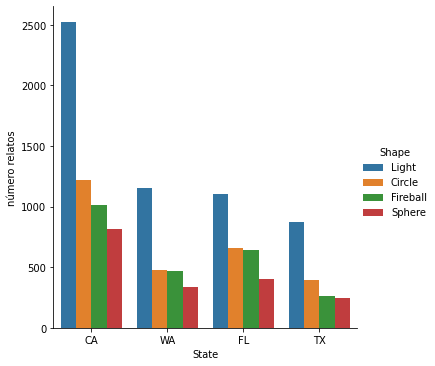

In [74]:
#grafico de barra agrupado
grafic_bar = sns.catplot( x ="State", y="número relatos", kind="bar",hue="Shape",data=quatro_estados_estados_unidos);

In [75]:
quatro_estados_estados_unidos

,State,City,Shape,número relatos
0,CA,Kramer Junction,Light,2526
1,CA,Berkeley,Circle,1216
2,WA,Kent,Light,1152
3,FL,Fort Myers,Light,1106
4,CA,Santa Rosa,Fireball,1012
5,TX,Lumberton,Light,870
6,CA,Los Angeles,Sphere,815
7,FL,Fort Pierce,Circle,658
8,FL,Naples,Fireball,639
9,WA,Vancouver,Circle,475


In [76]:
plt.savefig("grafic_bar.png") # baixar o grafico

<Figure size 432x288 with 0 Axes>

In [77]:
#grafico de barras empilhados
#grafic_bar_empilhado = plt.bar(x ="State", y="quantidade de ocorrencia", kind="bar",legend="forma",data=quatro_estados_estados_unidos)

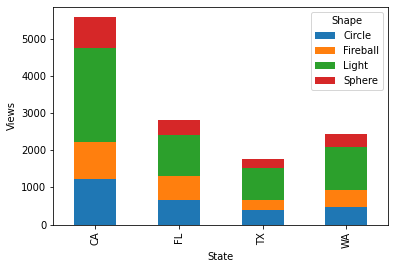

In [78]:
#grafico de barras empilhados
#agrupaando a tabela quatro estatos unidospor estado
#grafic_bar_empilhado = quatro_estados_estados_unidos.groupby(['state','TYPE']).sum().groupby(level=[1]).cumsum().nstack().plot(kind="bar",y="quantidade de ocorrencia",stacked = True)
#criando um grafico de barra empilhado
grafic_bar_empilhado = quatro_estados_estados_unidos.groupby(["State","Shape"]).sum().unstack().plot(kind="bar",y="número relatos", stacked=True);
plt.xlabel('State')
plt.ylabel('Views')
plt.show();
grafic_bar_empilhado


In [98]:
plt.savefig("grafic_bar_empilhado.png") # baixar o grafico

<Figure size 432x288 with 0 Axes>

In [80]:
#5.7 Limpeza de dados
#1 Carregar o seu arquivo OVNIS.csv em um dataframe;
#importando a biblioteca pandas
# função read_csv do pandas ppara ler o arquivo ovnis.csv está atribuindo a variavel ovnis_two

import pandas as pd
ovnis_two = pd.read_csv("OVNIS.csv") 

In [81]:
#2Remover registros que tenham valores vazios (None, Unknown, ...) para City, State e Shape;
#Primeiro df criado chama-se ovnis_two
ovnis_two["State"].dropna() # removendo os valores em branco
ovnis_two["City"].dropna()
ovnis_two["Shape"].dropna()

#Excluindo os valores nulos(em branco) das colunas state, city e shape dentro do df ovnis_two
ovnis_two.drop(ovnis_two.index[ovnis_two['State']==None],inplace=True) # inplace=true argumento serve para indicar que será usado o mesmo df
ovnis_two.drop(ovnis_two.index[ovnis_two['City']==None],inplace=True)
ovnis_two.drop(ovnis_two.index[ovnis_two['Shape']==None],inplace=True)

ovnis_two

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,1/29/97 23:15,East Greenwich,RI,Disk,5 minutes,"I witnessed a UFO which may be of the Lazar""Sp...",3/7/98
1,1/26/97 22:00,Flagstaff,AZ,Light,six minutes,It traveled at about the same speed we were go...,3/19/09
2,1/25/97 21:00,Marion,WI,Triangle,2 minutes,On a camping trip 3 triangle shaped objects we...,3/7/98
3,1/25/97 06:00,Mount Hope/Binbrook (Canada),ON,Disk,1/2 hour,"A large disk or saucer type object, approximat...",4/28/01
4,1/24/97 19:00,Alta,UT,Other,3 hours plus,"A ""moving star"" similar to a satellite stopped...",3/7/98
...,...,...,...,...,...,...,...
102386,12/1/17 17:00,Foyil,OK,Formation,All night,At dusk my wife and I noticed a star that look...,12/10/17
102387,12/1/17 04:00,Chesapeake,VA,Light,5 minutes,"Light was moving at a constant speed, vanished...",12/4/17
102388,12/1/17 04:00,Boise,ID,Cigar,10 minutes,Large cigar-shaped UFO with visible cabin lights.,12/4/17
102389,12/1/17 02:06,Ras Al khaimah (Oman/UAE),NaN,Light,10 seconds,UFO PASSING.,12/4/17


In [82]:
#ovnis_two.drop(ovnis.index[ovnis['City']=="Unknown"], inplace = True)
#ovnis_two

In [83]:
#3 Manter somente os registros referentes aos 51 estados dos Estados Unidos
#Utilizando a bibliotce pandassql
#utiliza o query para liitar o df ovnis_two para apenas conter os registros dos estados unidos, limitando apenas as ocorrencias que aconteceram nos estados unidos

q = """
   SELECT * from ovnis_two where State LIKE '%AK%' OR State LIKE '%AL%'
OR State LIKE '%AR%'
OR State LIKE '%AZ%'
OR State LIKE '%CA%'
OR State LIKE '%CO%'
OR State LIKE '%CT%'
OR State LIKE '%DE%'
OR State LIKE '%FL%'
OR State LIKE '%GA%'
OR State LIKE '%HI%'
OR State LIKE '%IA%'
OR State LIKE '%ID%'
OR State LIKE '%IL%'
OR State LIKE '%IN%'
OR State LIKE '%KS%'
OR State LIKE '%KY%'
OR State LIKE '%LA%'
OR State LIKE '%MA%'
OR State LIKE '%MD%'
OR State LIKE '%ME%'
OR State LIKE '%MI%'
OR State LIKE '%MN%' OR State LIKE '%MO%' OR State LIKE '%MS%' OR State LIKE '%MT%' OR State LIKE '%NC%' OR State LIKE '%ND%' 
OR State LIKE '%NE%' 
OR State LIKE '%NH%' 
OR State LIKE '%NJ%' 
OR State LIKE '%NM%' 
OR State LIKE '%NV%' 
OR State LIKE '%NY%' 
OR State LIKE '%OH%' 
OR State LIKE '%OK%' 
OR State LIKE '%OR%' 
OR State LIKE '%PA%' 
OR State LIKE '%RI%' 
OR State LIKE '%SC%' 
OR State LIKE '%SD%' 
OR State LIKE '%TN%' 
OR State LIKE '%TX%' 
OR State LIKE '%UT%' 
OR State LIKE '%VA%' 
OR State LIKE '%VT%' 
OR State LIKE '%WA%' 
OR State LIKE '%WI%' 
OR State LIKE '%WV%' 
OR State LIKE '%WY%'
  """
  #atribuindo o resultado da consulta sql a variavel estados unidos
estados_unidos = pandasql.sqldf(q.lower(), locals())
estados_unidos

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,1/29/97 23:15,East Greenwich,RI,Disk,5 minutes,"I witnessed a UFO which may be of the Lazar""Sp...",3/7/98
1,1/26/97 22:00,Flagstaff,AZ,Light,six minutes,It traveled at about the same speed we were go...,3/19/09
2,1/25/97 21:00,Marion,WI,Triangle,2 minutes,On a camping trip 3 triangle shaped objects we...,3/7/98
3,1/24/97 19:00,Alta,UT,Other,3 hours plus,"A ""moving star"" similar to a satellite stopped...",3/7/98
4,1/23/97 18:30,North Kingstown,RI,Triangle,3 minutes,1/23/97: Huge black triangle w/ rearguard heli...,1/27/05
...,...,...,...,...,...,...,...
90587,12/1/17 17:00,New Rochelle,NY,Sphere,5 minutes,Red light sphere moving in vertical and horizo...,12/4/17
90588,12/1/17 17:00,Foyil,OK,Formation,All night,At dusk my wife and I noticed a star that look...,12/10/17
90589,12/1/17 04:00,Chesapeake,VA,Light,5 minutes,"Light was moving at a constant speed, vanished...",12/4/17
90590,12/1/17 04:00,Boise,ID,Cigar,10 minutes,Large cigar-shaped UFO with visible cabin lights.,12/4/17


In [84]:
# 4 Remover variáveis irrelevantes para a análise (Duration, Summary e Posted);
# removendo as colunas duration, summary e posted por meio da função drop
# df estados unidos utilizando a função drop(remover) e passando argumento columns, que excluirá as colunas duration, summary e posted
df_OVNI_limpo  = estados_unidos.drop(columns=['Duration','Summary','Posted'], axis=1)
df_OVNI_limpo 


,Date / Time,City,State,Shape
0,1/29/97 23:15,East Greenwich,RI,Disk
1,1/26/97 22:00,Flagstaff,AZ,Light
2,1/25/97 21:00,Marion,WI,Triangle
3,1/24/97 19:00,Alta,UT,Other
4,1/23/97 18:30,North Kingstown,RI,Triangle
...,...,...,...,...
90587,12/1/17 17:00,New Rochelle,NY,Sphere
90588,12/1/17 17:00,Foyil,OK,Formation
90589,12/1/17 04:00,Chesapeake,VA,Light
90590,12/1/17 04:00,Boise,ID,Cigar


In [85]:
# 5 Manter somente os registros de Shapes mais populares (com mais de 1000 ocorrências);
#apagar os valores menos que 1000 da colua shape
 

In [86]:
# 5 df_OVNI_limpo = estados_unidos.drop(estados_unidos.index[estados_unidos['Shape']=="Teardrop"], inplace=True )
contando_shape = df_OVNI_limpo['Shape'].value_counts()
contando_shape

Light        19383
Circle        9546
Triangle      8601
Fireball      7638
Unknown       6538
Other         6125
Sphere        6032
Disk          4408
Oval          3963
Formation     2977
Changing      2318
Cigar         1962
Flash         1738
Rectangle     1475
Cylinder      1396
Diamond       1349
Chevron       1095
Teardrop       850
Egg            766
Cone           374
Cross          290
light           49
other           16
triangle        15
sphere           7
circle           6
cylinder         4
Crescent         2
cigar            2
Delta            2
rectangle        2
delta            1
diamond          1
oval             1
flash            1
fireball         1
Flare            1
Hexagon          1
egg              1
unknown          1
pyramid          1
Name: Shape, dtype: int64

In [87]:
# 5 contando os shape e excluindo que apresenta menos que 1000 por meio do for in
for i in contando_shape[contando_shape < 1000].index:df_OVNI_limpo.drop( df_OVNI_limpo.index [ df_OVNI_limpo['Shape'] == i], inplace = True)
 
df_OVNI_limpo

,Date / Time,City,State,Shape
0,1/29/97 23:15,East Greenwich,RI,Disk
1,1/26/97 22:00,Flagstaff,AZ,Light
2,1/25/97 21:00,Marion,WI,Triangle
3,1/24/97 19:00,Alta,UT,Other
4,1/23/97 18:30,North Kingstown,RI,Triangle
...,...,...,...,...
90587,12/1/17 17:00,New Rochelle,NY,Sphere
90588,12/1/17 17:00,Foyil,OK,Formation
90589,12/1/17 04:00,Chesapeake,VA,Light
90590,12/1/17 04:00,Boise,ID,Cigar


In [88]:
# 6 Salvar o dataframe final em um arquivo CSV com o nome "df_OVNI_limpo".

df_OVNI_limpo.to_csv("df_OVNI_limpo.csv", index=False)

In [89]:
#5.8 Acréscimo de variáveis
# 1 Carregar o seu arquivo df_OVNI_limpo.csv (arquivo gerado após a limpeza de dados efetuada na atividade 5.7) em um dataframe;
acres_variavel = pd.read_csv("df_OVNI_limpo.csv")
acres_variavel

,Date / Time,City,State,Shape
0,1/29/97 23:15,East Greenwich,RI,Disk
1,1/26/97 22:00,Flagstaff,AZ,Light
2,1/25/97 21:00,Marion,WI,Triangle
3,1/24/97 19:00,Alta,UT,Other
4,1/23/97 18:30,North Kingstown,RI,Triangle
...,...,...,...,...
88192,12/1/17 17:00,New Rochelle,NY,Sphere
88193,12/1/17 17:00,Foyil,OK,Formation
88194,12/1/17 04:00,Chesapeake,VA,Light
88195,12/1/17 04:00,Boise,ID,Cigar


In [90]:
# 2 Dividir o conteúdo da coluna Date / Time em duas novas colunas no mesmo dataframe e deletar a coluna Date / Time.

acres_variavel["Date / Time"] = pd.to_datetime(acres_variavel["Date / Time"])

In [91]:
# 3 criando uma coluna para data e time. 
acres_variavel["sight_Date"], acres_variavel["sight_Time"] = (acres_variavel["Date / Time"].dt.date, acres_variavel["Date / Time"].dt.time)
acres_variavel

,Date / Time,City,State,Shape,sight_Date,sight_Time
0,1997-01-29 23:15:00,East Greenwich,RI,Disk,1997-01-29,23:15:00
1,1997-01-26 22:00:00,Flagstaff,AZ,Light,1997-01-26,22:00:00
2,1997-01-25 21:00:00,Marion,WI,Triangle,1997-01-25,21:00:00
3,1997-01-24 19:00:00,Alta,UT,Other,1997-01-24,19:00:00
4,1997-01-23 18:30:00,North Kingstown,RI,Triangle,1997-01-23,18:30:00
...,...,...,...,...,...,...
88192,2017-12-01 17:00:00,New Rochelle,NY,Sphere,2017-12-01,17:00:00
88193,2017-12-01 17:00:00,Foyil,OK,Formation,2017-12-01,17:00:00
88194,2017-12-01 04:00:00,Chesapeake,VA,Light,2017-12-01,04:00:00
88195,2017-12-01 04:00:00,Boise,ID,Cigar,2017-12-01,04:00:00


In [92]:

# 4 Excluindo a tabela date/time com a função drop.
df_OVNI_preparado = acres_variavel.drop(columns=['Date / Time'],axis=1)
df_OVNI_preparado


,City,State,Shape,sight_Date,sight_Time
0,East Greenwich,RI,Disk,1997-01-29,23:15:00
1,Flagstaff,AZ,Light,1997-01-26,22:00:00
2,Marion,WI,Triangle,1997-01-25,21:00:00
3,Alta,UT,Other,1997-01-24,19:00:00
4,North Kingstown,RI,Triangle,1997-01-23,18:30:00
...,...,...,...,...,...
88192,New Rochelle,NY,Sphere,2017-12-01,17:00:00
88193,Foyil,OK,Formation,2017-12-01,17:00:00
88194,Chesapeake,VA,Light,2017-12-01,04:00:00
88195,Boise,ID,Cigar,2017-12-01,04:00:00


In [93]:
 #4criando uma nova coluna chmada sight weekdays(dias da semana).
 df_OVNI_preparado["sight_Weekdays"] = (acres_variavel["Date / Time"].dt.weekday)
 df_OVNI_preparado


,City,State,Shape,sight_Date,sight_Time,sight_Weekdays
0,East Greenwich,RI,Disk,1997-01-29,23:15:00,2
1,Flagstaff,AZ,Light,1997-01-26,22:00:00,6
2,Marion,WI,Triangle,1997-01-25,21:00:00,5
3,Alta,UT,Other,1997-01-24,19:00:00,4
4,North Kingstown,RI,Triangle,1997-01-23,18:30:00,3
...,...,...,...,...,...,...
88192,New Rochelle,NY,Sphere,2017-12-01,17:00:00,4
88193,Foyil,OK,Formation,2017-12-01,17:00:00,4
88194,Chesapeake,VA,Light,2017-12-01,04:00:00,4
88195,Boise,ID,Cigar,2017-12-01,04:00:00,4


In [94]:
# 4 colocando os nomes da semana.
dia_semana={0:'Segunda-Feira',1:'Terça-Feira',2:'Quarta-Feira',3:'Quinta-Feira',4:'SextaFeira',5:'Sábado',6:'Domingo',}
df_OVNI_preparado["sight_Weekdays"] = acres_variavel["Date / Time"].dt.weekday.map(dia_semana)
df_OVNI_preparado

,City,State,Shape,sight_Date,sight_Time,sight_Weekdays
0,East Greenwich,RI,Disk,1997-01-29,23:15:00,Quarta-Feira
1,Flagstaff,AZ,Light,1997-01-26,22:00:00,Domingo
2,Marion,WI,Triangle,1997-01-25,21:00:00,Sábado
3,Alta,UT,Other,1997-01-24,19:00:00,SextaFeira
4,North Kingstown,RI,Triangle,1997-01-23,18:30:00,Quinta-Feira
...,...,...,...,...,...,...
88192,New Rochelle,NY,Sphere,2017-12-01,17:00:00,SextaFeira
88193,Foyil,OK,Formation,2017-12-01,17:00:00,SextaFeira
88194,Chesapeake,VA,Light,2017-12-01,04:00:00,SextaFeira
88195,Boise,ID,Cigar,2017-12-01,04:00:00,SextaFeira


In [95]:
# 4 criando duas variaveis para dia e mês da em uma nova tabela.
df_OVNI_preparado["sight_Day"],df_OVNI_preparado["sight_Month"] = (acres_variavel["Date / Time"].dt.day, acres_variavel["Date / Time"].dt.month)

df_OVNI_preparado

,City,State,Shape,sight_Date,sight_Time,sight_Weekdays,sight_Day,sight_Month
0,East Greenwich,RI,Disk,1997-01-29,23:15:00,Quarta-Feira,29,1
1,Flagstaff,AZ,Light,1997-01-26,22:00:00,Domingo,26,1
2,Marion,WI,Triangle,1997-01-25,21:00:00,Sábado,25,1
3,Alta,UT,Other,1997-01-24,19:00:00,SextaFeira,24,1
4,North Kingstown,RI,Triangle,1997-01-23,18:30:00,Quinta-Feira,23,1
...,...,...,...,...,...,...,...,...
88192,New Rochelle,NY,Sphere,2017-12-01,17:00:00,SextaFeira,1,12
88193,Foyil,OK,Formation,2017-12-01,17:00:00,SextaFeira,1,12
88194,Chesapeake,VA,Light,2017-12-01,04:00:00,SextaFeira,1,12
88195,Boise,ID,Cigar,2017-12-01,04:00:00,SextaFeira,1,12


In [96]:
# 5 salvando o arquivo em um dataframe.
df_OVNI_preparado.to_csv("df_OVNI_preparado.csv", index=False)

In [97]:
# 5 Lendo o arquivo em um novo dataframe.
novo = pd.read_csv("df_OVNI_preparado.csv")
novo

,City,State,Shape,sight_Date,sight_Time,sight_Weekdays,sight_Day,sight_Month
0,East Greenwich,RI,Disk,1997-01-29,23:15:00,Quarta-Feira,29,1
1,Flagstaff,AZ,Light,1997-01-26,22:00:00,Domingo,26,1
2,Marion,WI,Triangle,1997-01-25,21:00:00,Sábado,25,1
3,Alta,UT,Other,1997-01-24,19:00:00,SextaFeira,24,1
4,North Kingstown,RI,Triangle,1997-01-23,18:30:00,Quinta-Feira,23,1
...,...,...,...,...,...,...,...,...
88192,New Rochelle,NY,Sphere,2017-12-01,17:00:00,SextaFeira,1,12
88193,Foyil,OK,Formation,2017-12-01,17:00:00,SextaFeira,1,12
88194,Chesapeake,VA,Light,2017-12-01,04:00:00,SextaFeira,1,12
88195,Boise,ID,Cigar,2017-12-01,04:00:00,SextaFeira,1,12
